In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [6]:
arquivo = r"C:\Users\rafae\Downloads\arquivos_dados\pacientesUltra_comSexo - pacientesUltra_comSexo.csv (1).csv"
df = pd.read_csv(arquivo)
df.head()


,DR,Data,Sexo,EXAME,Plano,DATA NASC
0,CINTIA,2020-01-02 00:00:00,Masculino,ABD TOTAL,PARTICULAR,1971-07-05 00:00:00
1,CINTIA,2020-01-02 00:00:00,Masculino,ABD TOTAL,PARTICULAR,1958-12-26 00:00:00
2,CINTIA,2020-01-02 00:00:00,Masculino,RENAL,PARTICULAR,1935-01-08 00:00:00
3,ADRIANO,2020-01-03 00:00:00,Masculino,PAREDE ABD,UNIMED,1980-02-25 00:00:00
4,SERGIO,2020-01-06 00:00:00,Masculino,PROSTATA VIA ABD,PARTICULAR,1931-09-18 00:00:00


In [7]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857 entries, 0 to 4856
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DR         4857 non-null   object
 1   Data       4857 non-null   object
 2   Sexo       4856 non-null   object
 3   EXAME      4855 non-null   object
 4   Plano      4841 non-null   object
 5   DATA NASC  4789 non-null   object
dtypes: object(6)
memory usage: 227.8+ KB


,DR,Data,Sexo,EXAME,Plano,DATA NASC
0,CINTIA,2020-01-02 00:00:00,Masculino,ABD TOTAL,PARTICULAR,1971-07-05 00:00:00
1,CINTIA,2020-01-02 00:00:00,Masculino,ABD TOTAL,PARTICULAR,1958-12-26 00:00:00
2,CINTIA,2020-01-02 00:00:00,Masculino,RENAL,PARTICULAR,1935-01-08 00:00:00
3,ADRIANO,2020-01-03 00:00:00,Masculino,PAREDE ABD,UNIMED,1980-02-25 00:00:00
4,SERGIO,2020-01-06 00:00:00,Masculino,PROSTATA VIA ABD,PARTICULAR,1931-09-18 00:00:00


In [9]:
# Padronizar nomes de colunas (minúsculas e sem espaços)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Conferir se deu certo
print(df.columns.tolist())


['dr', 'data', 'sexo', 'exame', 'plano', 'data_nasc']


In [11]:
df['idade'] = ((hoje - df['data_nasc']).dt.days / 365.25)
df['idade'] = pd.to_numeric(df['idade'], errors='coerce').round().astype('Int64')


In [12]:
df[['data_nasc', 'idade']].head(10)


,data_nasc,idade
0,1971-07-05,54
1,1958-12-26,67
2,1935-01-08,91
3,1980-02-25,46
4,1931-09-18,94
5,1944-09-13,81
6,1941-09-29,84
7,1950-04-09,76
8,1958-03-13,68
9,1949-10-03,76


In [13]:
# Criar faixas etárias
bins = [0, 17, 29, 44, 59, 74, 120]
labels = ['0-17', '18-29', '30-44', '45-59', '60-74', '75+']

df['faixa_etaria'] = pd.cut(df['idade'], bins=bins, labels=labels, right=True)

# Ver primeiros resultados
df[['idade', 'faixa_etaria']].head(10)


,idade,faixa_etaria
0,54,45-59
1,67,60-74
2,91,75+
3,46,45-59
4,94,75+
5,81,75+
6,84,75+
7,76,75+
8,68,60-74
9,76,75+


In [14]:
df['faixa_etaria'].value_counts().sort_index()


faixa_etaria
0-17       23
18-29     905
30-44    2234
45-59     912
60-74     471
75+       152
Name: count, dtype: int64

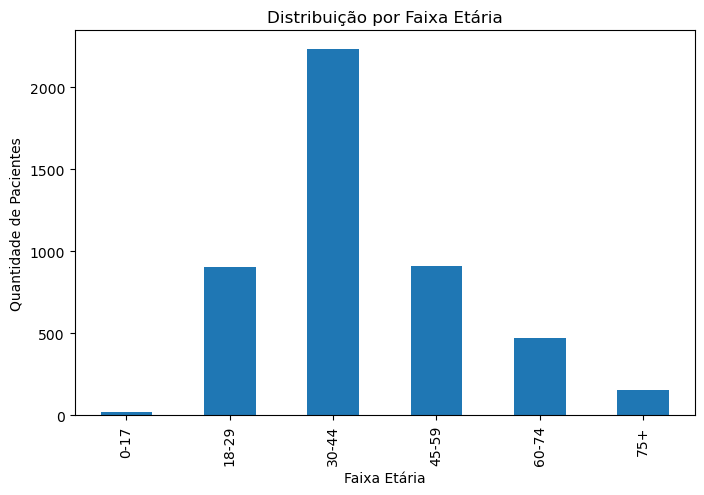

In [15]:
import matplotlib.pyplot as plt

# Gráfico simples de distribuição etária
df['faixa_etaria'].value_counts().sort_index().plot(
    kind='bar',
    figsize=(8,5),
    title='Distribuição por Faixa Etária',
    xlabel='Faixa Etária',
    ylabel='Quantidade de Pacientes'
)

plt.show()


In [19]:
# Limpar espaços e padronizar minúsculas
df['sexo'] = df['sexo'].str.strip().str.lower()

# Corrigir erros de digitação e normalizar os nomes
df['sexo'] = df['sexo'].replace({
    'masculino': 'Masculino',
    'feminino': 'Feminino',
    'feminio': 'Feminino'  # corrige o erro de digitação
})

# Conferir contagem final
df['sexo'].value_counts()


sexo
Feminino     4316
Masculino     540
Name: count, dtype: int64

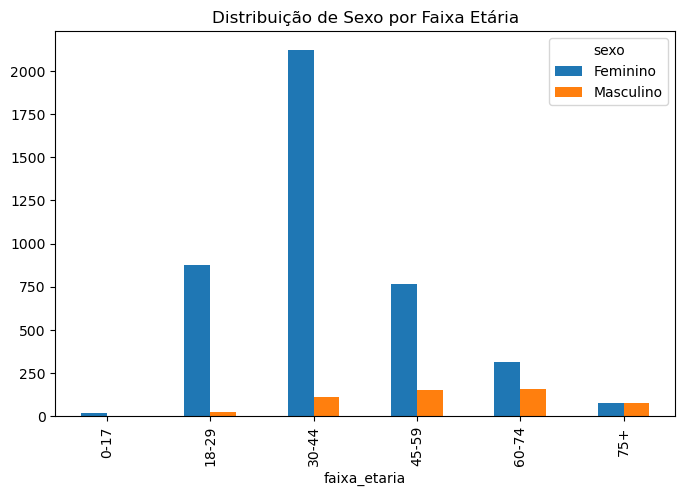

In [20]:
pd.crosstab(df['faixa_etaria'], df['sexo']).plot(
    kind='bar',
    figsize=(8,5),
    title='Distribuição de Sexo por Faixa Etária'
)
plt.show()


In [24]:
top_exames = df['exame'].value_counts().head(10)
print(top_exames)


exame
OBSTETRICA         762
TRANSVAGINAL       567
TV                 345
ABD TOTAL          248
MORFOLOGICA        219
OBST C/ DOPPLER    177
TV+MAMAS           170
TV OBST            164
RENAL              130
ABT                124
Name: count, dtype: int64


In [26]:
df_top_exames = df[df['exame'].isin(top_exames.index)]


In [27]:
tabela_exame = pd.crosstab(df_top_exames['faixa_etaria'], df_top_exames['exame'])
print(tabela_exame)


exame         ABD TOTAL  ABT  MORFOLOGICA  OBST C/ DOPPLER  OBSTETRICA  RENAL  \
faixa_etaria                                                                    
0-17                  0    1            1                0           2      0   
18-29                 8   14           70               48         256     14   
30-44                63   33          127              106         438     37   
45-59                86   37           14               21          41     33   
60-74                70   29            0                0           2     25   
75+                  15    7            0                0           0     18   

exame         TRANSVAGINAL   TV  TV OBST  TV+MAMAS  
faixa_etaria                                        
0-17                     3    3        1         0  
18-29                  110   69       34        20  
30-44                  321  186      112        86  
45-59                   98   56       10        41  
60-74                   19    8  

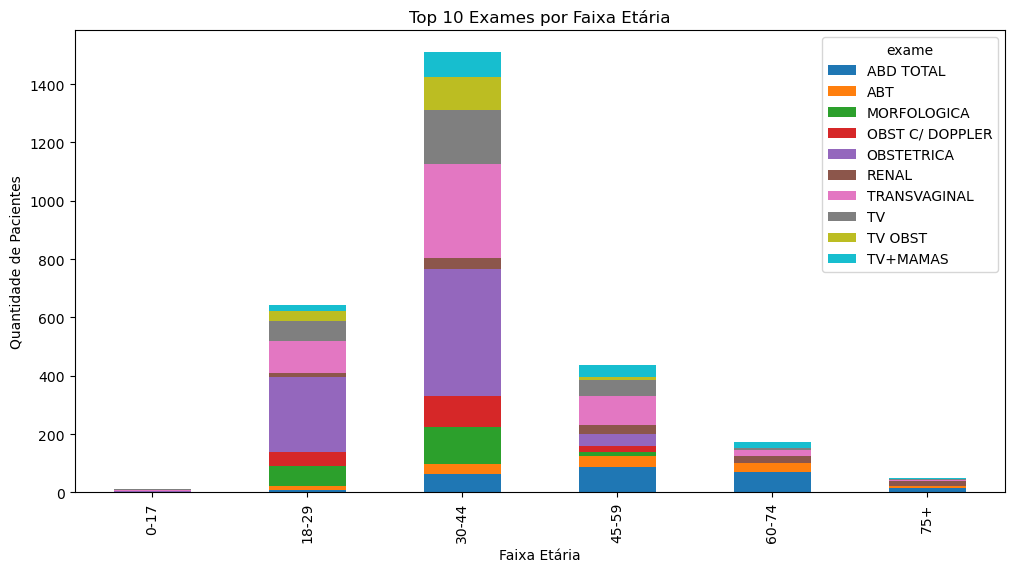

In [28]:
tabela_exame.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    title='Top 10 Exames por Faixa Etária'
)
plt.xlabel("Faixa Etária")
plt.ylabel("Quantidade de Pacientes")
plt.show()


exame      ABD TOTAL  ABT  MORFOLOGICA  OBST C/ DOPPLER  OBSTETRICA  RENAL  \
sexo                                                                         
Feminino         171   81          219              177         762     80   
Masculino         77   43            0                0           0     49   

exame      TRANSVAGINAL   TV  TV OBST  TV+MAMAS  
sexo                                             
Feminino            564  341      164       170  
Masculino             3    4        0         0  


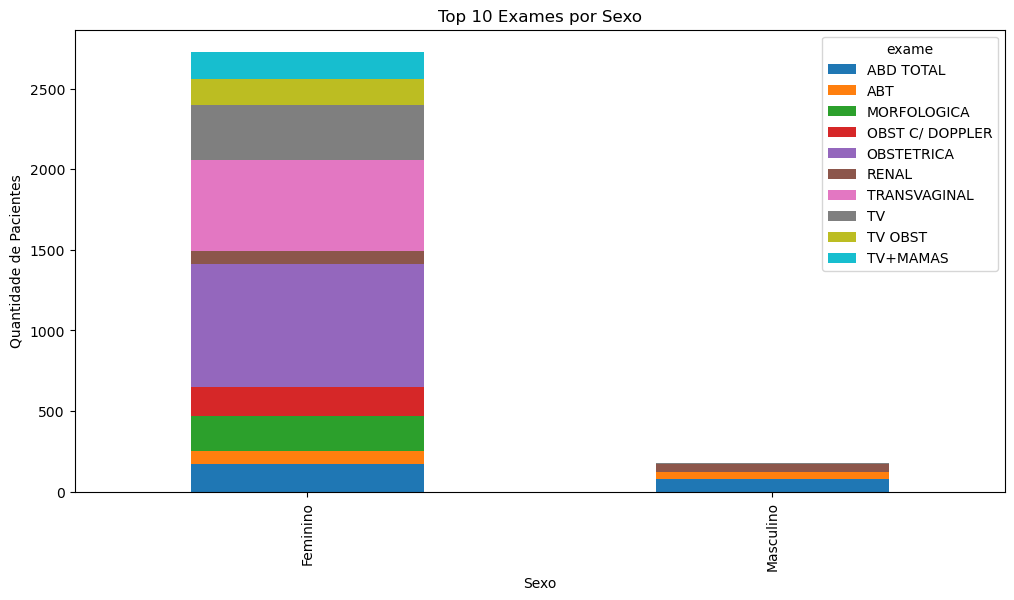

In [29]:
tabela_sexo_exame = pd.crosstab(df_top_exames['sexo'], df_top_exames['exame'])
print(tabela_sexo_exame)

# Gráfico
tabela_sexo_exame.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    title='Top 10 Exames por Sexo'
)
plt.xlabel("Sexo")
plt.ylabel("Quantidade de Pacientes")
plt.show()


exame          ABD TOTAL  ABT  MORFOLOGICA  OBST C/ DOPPLER  OBSTETRICA  \
plano                                                                     
CEMERU                 0    0            1                0           0   
CORTESIA               2    0            0                0           1   
CORTESIA MANG          0    0            0                0           1   
MANGARATIBA            1    0            0                0           2   
OBSTETRICA             0    0            0                0           1   
PARTCULAR              0    0            0                0           0   
PARTICULAR           131   71          167              118         608   
UNIMED               114   53           51               59         147   
unimed                 0    0            0                0           2   
´PARTICULAR            0    0            0                0           0   

exame          RENAL  TRANSVAGINAL   TV  TV OBST  TV+MAMAS  
plano                                 

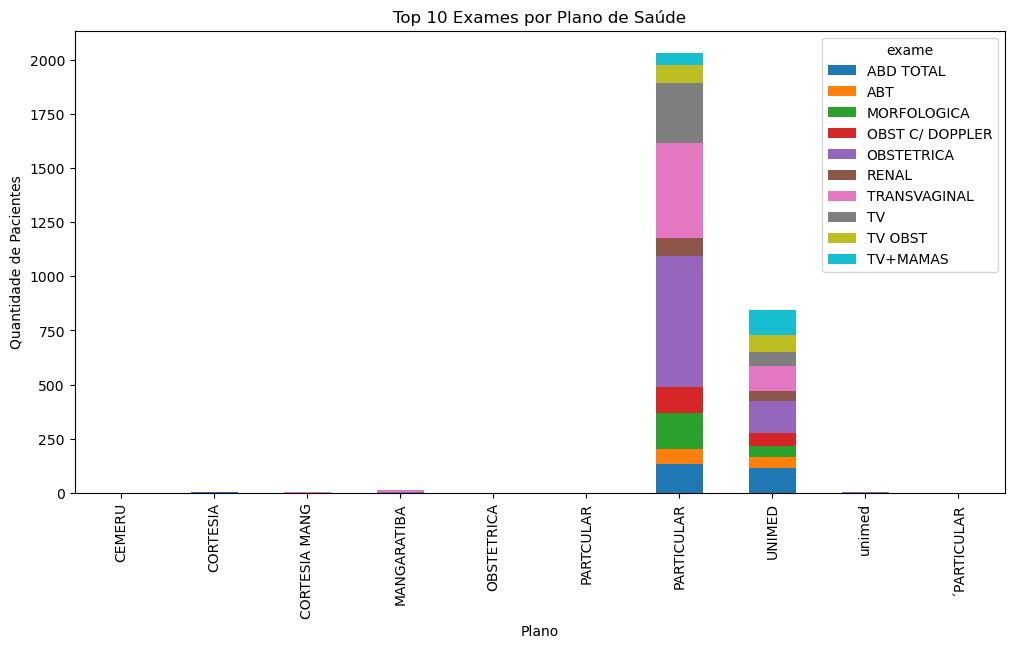

In [30]:
tabela_plano_exame = pd.crosstab(df_top_exames['plano'], df_top_exames['exame'])
print(tabela_plano_exame)

tabela_plano_exame.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    title='Top 10 Exames por Plano de Saúde'
)
plt.xlabel("Plano")
plt.ylabel("Quantidade de Pacientes")
plt.show()


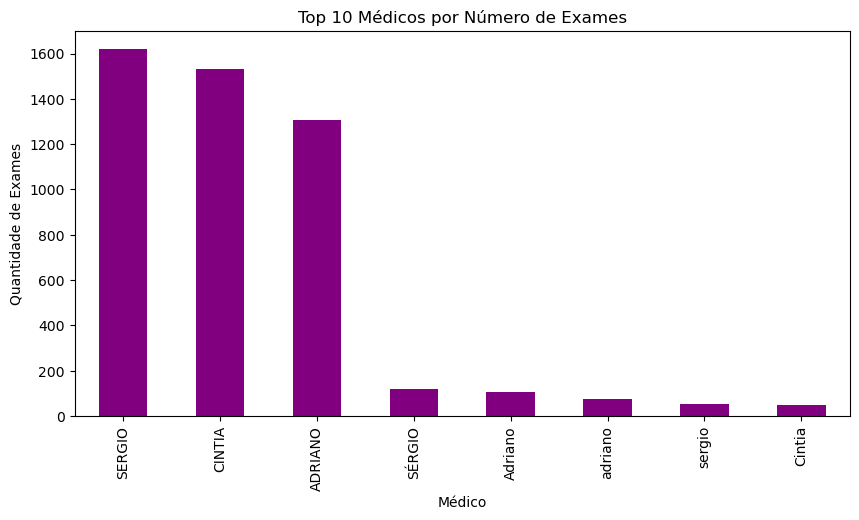

In [32]:
df['dr'].value_counts().head(10).plot(
    kind='bar', figsize=(10,5),
    title='Top 10 Médicos por Número de Exames',
    color='purple'
)
plt.xlabel("Médico")
plt.ylabel("Quantidade de Exames")
plt.show()


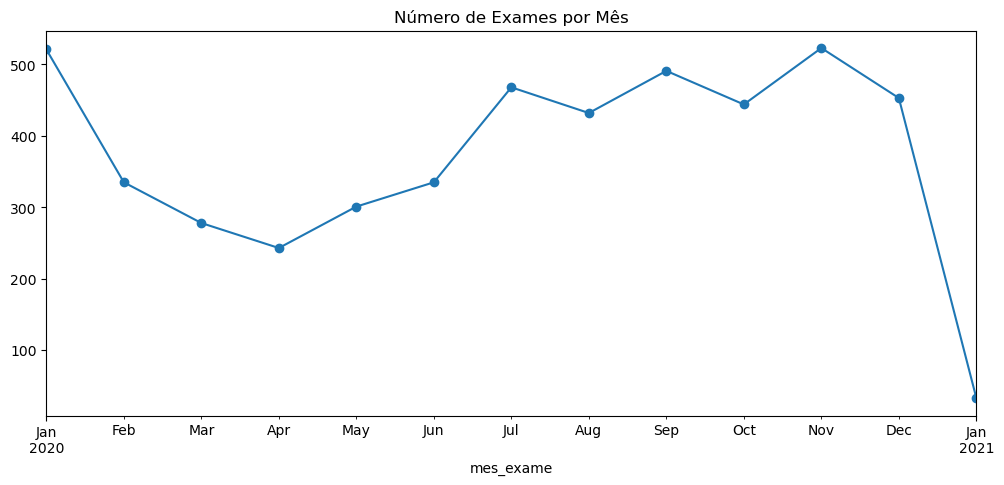

In [33]:
df['mes_exame'] = df['data'].dt.to_period('M')
df.groupby('mes_exame').size().plot(kind='line', marker='o', figsize=(12,5), title='Número de Exames por Mês')
plt.show()
#Sazonalidade / Exames por Mês

In [35]:
df.groupby('exame')['idade'].mean().sort_values(ascending=False)
# Idade média / distribuição de idade por exame

exame
BRAÇO                   88.0
PAREDE BILATERAL        88.0
REG ING BILATERAL       87.0
ABD TOTAL E PROSTATA    87.0
PROSTATA+RINS           84.0
                        ... 
TRANS+MAMAS             <NA>
TV OSSO DUCTO VENOSO    <NA>
TV+MAMA+PAREDE ABD      <NA>
Valor Total             <NA>
retorno                 <NA>
Name: idade, Length: 559, dtype: Float64

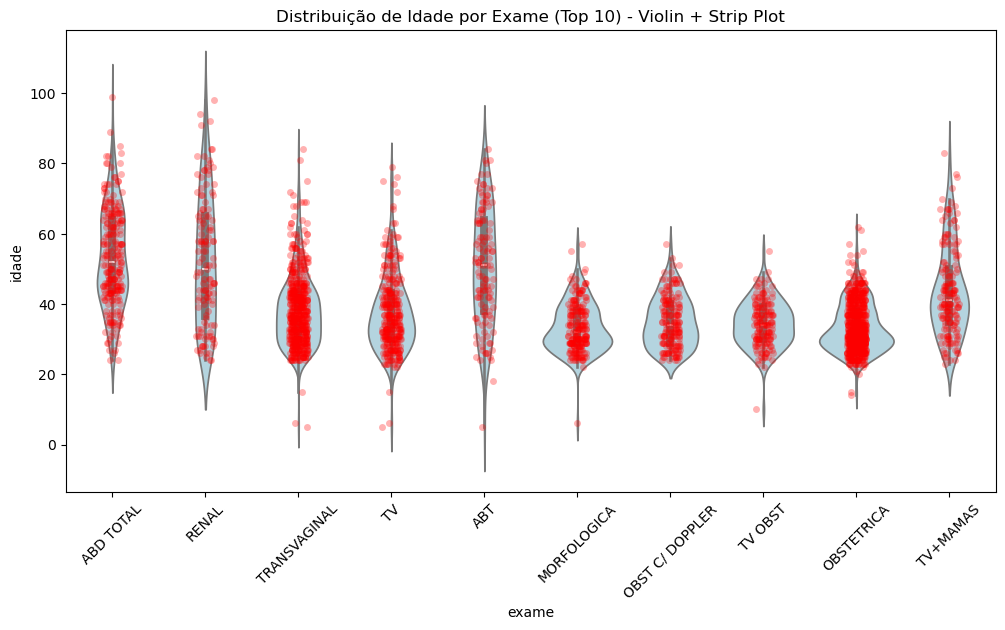

In [39]:
plt.figure(figsize=(12,6))

# Violin plot simples, sem palette (evita warning)
sns.violinplot(
    data=df[df['exame'].isin(top_exames.index)],
    x='exame',
    y='idade',
    color="lightblue"  # cor única
)

# Pontinhos de cada paciente sobre o violin plot
sns.stripplot(
    data=df[df['exame'].isin(top_exames.index)],
    x='exame',
    y='idade',
    color='red',
    alpha=0.3
)

plt.xticks(rotation=45)
plt.title("Distribuição de Idade por Exame (Top 10) - Violin + Strip Plot")
plt.show()


In [41]:
df['faixa_etaria'].value_counts().sort_index()


faixa_etaria
0-17       23
18-29     905
30-44    2234
45-59     912
60-74     471
75+       152
Name: count, dtype: int64

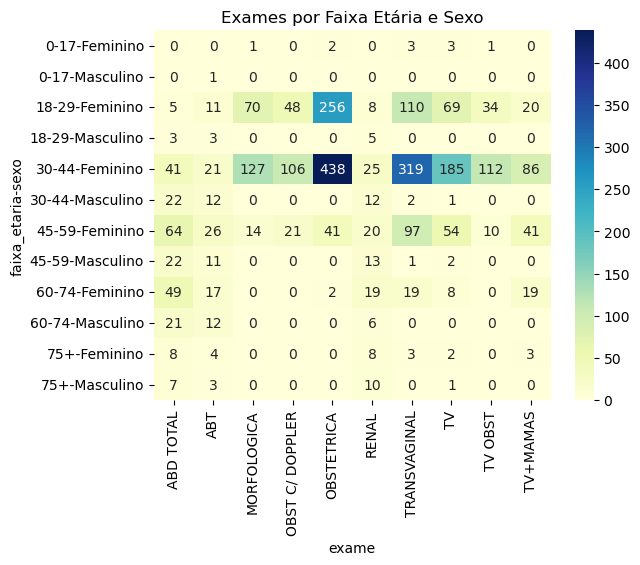

In [44]:
tabela_heatmap = pd.crosstab([df['faixa_etaria'], df['sexo']], df_top_exames['exame'])
sns.heatmap(tabela_heatmap, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Exames por Faixa Etária e Sexo")
plt.show()
